In [95]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [181]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [97]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [98]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [99]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)



In [100]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [101]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [102]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [103]:
# Explore the table measurement to find the columns
inspector = inspect(engine)

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [104]:
# Explore the table measurement to find the columns

columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [252]:
# Find the most recent date in the data set.

# Total dates
session.query(func.count(measurement.date)).all()

[(19550,)]

In [253]:
# Determine the latest Date
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
latest_date[0]


'2017-08-23'

In [254]:
query_date = dt.datetime.strptime(latest_date[0], '%Y-%m-%d') - dt.timedelta(days = 366)
query_date

datetime.datetime(2016, 8, 22, 0, 0)

In [255]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp)\
    .filter(measurement.date >= query_date, measurement.prcp >=0).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
results_df = pd.DataFrame(results, columns=['date', 'precipitation'])
results_df = results_df.set_index('date')

# Sort the dataframe by date
results_df = results_df.sort_values(by='date', axis=0, ascending=True)
results_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


In [256]:
# Count of the results
results_df.count()

precipitation    2021
dtype: int64

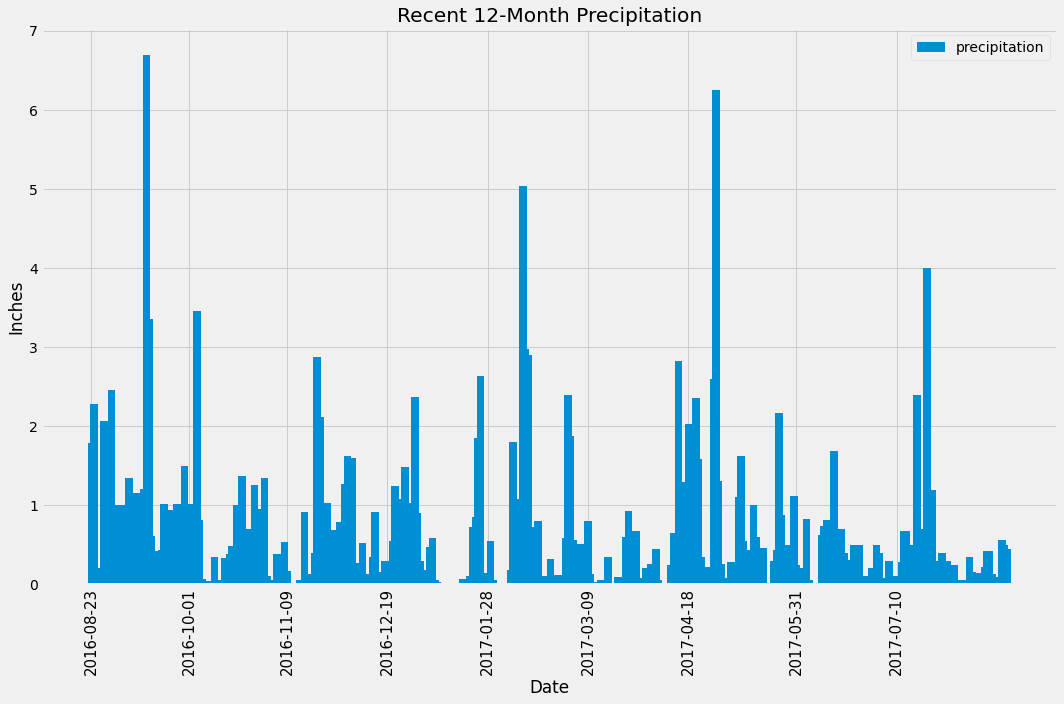

In [268]:
plt.figure(figsize=(15,10))
plt.bar(results_df.index, results_df['precipitation'], width=3, label="precipitation")
plt.xticks(rotation='vertical', fontsize=15)
plt.xticks(['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10'])
plt.title('Recent 12-Month Precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(loc="upper right", fontsize="medium")
plt.tight_layout()
plt.show()

In [269]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [52]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(func.distinct(measurement.station))).all()

[(9,)]

In [58]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station)\
    .order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [60]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Lowest Temperature
session.query(func.min(measurement.tobs)).filter(measurement.station == "USC00519281").all()

[(54.0,)]

In [61]:
#Highest Temperature
session.query(func.max(measurement.tobs)).filter(measurement.station == "USC00519281").all()

[(85.0,)]

In [63]:
# Average Temperature
session.query(func.avg(measurement.tobs)).filter(measurement.station == "USC00519281").all()

[(71.66378066378067,)]

In [89]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_results = session.query(measurement.tobs)\
    .filter(measurement.date >= "2016-08-23", measurement.station == "USC00519281").all()
tobs_results

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


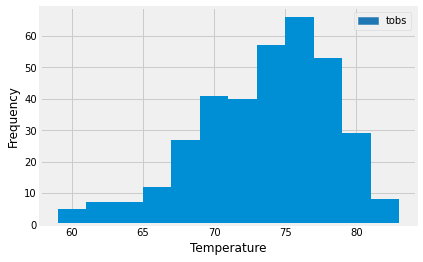

In [93]:
# Plot the results in a histogram with bins=12
import matplotlib.patches as mpatches

counts, bins = np.histogram(tobs_results_df, bins=12)
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
legend = mpatches.Patch(color='#1f77b4', label='tobs')
plt.legend(handles=[legend])
plt.show()

# Close session

In [94]:
# Close Session
session.close()